# Project 8: Local Optimization

## Gradient descent

Gradient descent is the most common optimization algorithm for local optimization. One takes the gradient of the function at the starting point, and follows the direction of the steepest descent (or the opposite of the gradient, since the positive value for gradient shows the direction and rate of the fastest increase).

Pros:
- most intuitive in terms of understanding
- easy to implement into code

Cons:
- up to the user to decide how often to evaluate gradient (or more simply, the derivative)
- how far down a determined direction should we go before evaluating the gradient again in case we need to change direction? (step length)

## Local optimization of the Rosenbrock function

The Rosenbrock function is a common function to test optimization. The function is defined by 

$$ f(x,y) = (a-x)^2 + b(y-x^2)^2 $$

The parameters will be set so that $a = 1$ and $b = 100$. These parameters will set it so that the function will be zero at $(1,1)$. In other words, the global minimum of this function at these parameters are $(1,1,0)$. Let's see how close we can get with local optimization.

### Graphing the Rosenbrock function


<ipython-input-10-6ae81d542e0b>:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


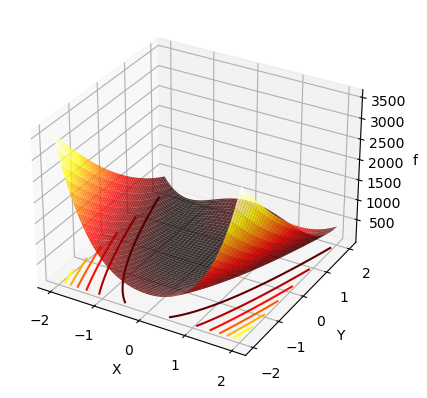

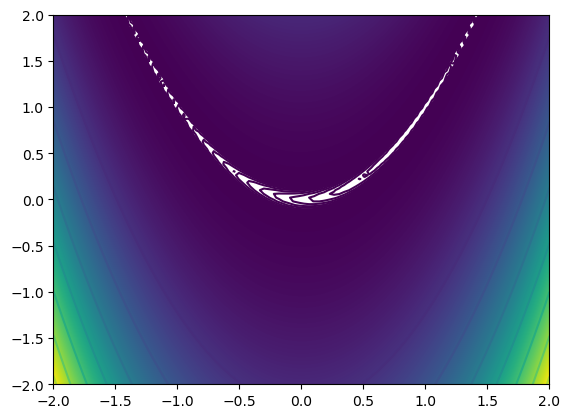

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rosenbrock(xy, a=1, b=100):
    '''xy = array of [x, y] values'''
    x = xy[0]
    y = xy[1]
    return (a-x)**2 + b*(y-x**2)**2

x_min, x_max = -2, 2 
y_min, y_max = -2, 2 

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

xy = np.meshgrid(nx,ny)
z = rosenbrock(xy)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='hot', alpha=0.8)
cset = ax.contour(x,y,z, cmap='hot', zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()

#a contour plot for a better view
fig2 = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)

plt.show()

### Local minimzation using gradient descent (variable step size)

step:     68.32017645807709 68.00640400917669
step:     68.00640400917669 0.31573917468350704
step:     0.31573917468350704 0.2941254021232641
step:     0.2941254021232641 0.287104201184163
step:     0.287104201184163 0.28546983643361146
step:     0.28546983643361146 0.27900587390460857
step:     0.27900587390460857 0.20832489906333077
step:     0.20832489906333077 0.31449974610482984


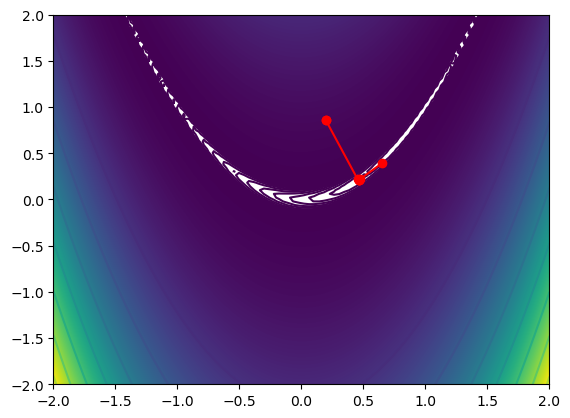

results of f_min:  0.20832489906333077   number of iterations:   8
starting point: [0.19525402 0.86075747] value of function here: 68.32017645807709
ending point: [0.64885406 0.39185316] value of function here: 0.20832489906333077


In [15]:
def derivative(xy, f=rosenbrock, d=0.001):
    '''
    f: callable func
    xy: [0.0, 1.0]
    d: precision to compute the numerical gradient based on the central difference
    '''
    x, y = xy[0], xy[1]
    x1 = np.array([x+d/2, y])
    x2 = np.array([x-d/2, y])
    y1 = np.array([x, y+d/2])
    y2 = np.array([x,y-d/2])
    dfdx = (f(x1)-f(x2))/d  #central diff on x
    dfdy = (f(y1)-f(y2))/d  #central diff on y
    return np.array([dfdx,dfdy])  #df/dx, df/dy

#minimzation using gradient descent
def gradient_optim(xy0, f=rosenbrock, N=1000):
    '''xy0: 1x2 array because it has x and y values'''
    #initial values
    xy_now = xy0
    xy_prev = None
    xy_hist = []
    xy_hist.append(xy_now)
    
    for i in range(N):
        df_now = derivative(xy_now, rosenbrock)
        
        if xy_prev is None:
            dxy = 0.00001  #note this is incredibly small 
        else:
            df_prev = derivative(xy_prev, rosenbrock)
            dd = df_now - df_prev
            dxy = np.dot(xy_now - xy_prev, dd) / (np.linalg.norm(dd))**2
        
        xy_next = xy_now - df_now * dxy
        #x_next, y_next = xy_next[0], xy_next[1]
        #x_now, y_now = xy_now[0], xy_now[1]
        
        print("step:    ", f(xy_now), f(xy_next))
        if f(xy_next) > f(xy_now):
            break
        else:
            xy_prev = xy_now
            xy_now = xy_next
            xy_hist.append(xy_now)

    return np.array(xy_hist), f(xy_now)

#random initial points
def init(x_min, x_max, y_min, y_max):
    np.random.seed(0)  #don't forget to take this away later
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return np.array([x0, y0])

#doing the minimization
xy_hist, f_min = gradient_optim(init(x_min, x_max, y_min, y_max))

#plotting
fig2 = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)

plt.plot(xy_hist[:,0], xy_hist[:,1],'-ro')
plt.show()

print('results of f_min: ', f_min, '  number of iterations:  ', len(xy_hist))

print('starting point:', xy_hist[0], 'value of function here:', rosenbrock(xy_hist[0]))
print('ending point:', xy_hist[-1], 'value of function here:', rosenbrock(xy_hist[-1]))

## BFGS (and introduction to quasi-Newton methods)

This is a type of quasi-Newton method. In general, quasi-Newton methods require that we consider the second order derivative using the inverse Hessian matrix of the function as a way to reduce the number of steps we need to take to get to the local minimum. The step to the next pair of is determined by:

$$ u_{n+1} = u_n - H(u_n)^{-1} \nabla f(u_n) $$

with $n$ being the current iteration and $u$ being the array of our initial values (in the Rosenbrock function, x and y).

The Hessian matrix (H) is a square matrix of second order partial derivatives. Actually calculating the inverse Hessian at every step is computationally expensive, so instead it is approximated as $B$. All quasi-Newton methods must satisfy the below condition (also called the secant equation):

$$ B_{n+1}[u_{n+1} - u_{n}] = \nabla f(u_{n+1}) - \nabla f(u_{n}) $$

It is in solving $B$ that the different types of quasi-Newton methods come in. Different methods will put different constraints on $B$ in order to come up with an answer.

Since it's the inverse Hessian that's being calculated, we can just directly solve for $B^{-1}$. Other than the secant equation, BFGS puts the additional following constraints on $B^{-1}$:
- must be symmetric ($NxN$ matrix)
- must always be positive and definite
- $B_{n+1}^{-1}$ must be close to $B^{-1}$ at every iteration
    - this is solved by using the Frobenius norm, which is the square root of the sum of the absoluate value squared of the matrix elements (written below)
    
    $$ ||A||_{F} = \sqrt{\sum^{m}_{i} \sum^{n}_{j} |a_{ij}|^2} $$
    
    (an $A$ matrix with $m$ x $n$ dimensions)
    
All these constraints and the initial quasi-Newton condition shows us how BFGS calculates $B^{-1}$. 

$$ B^{-1}_{n+1} = B^{-1}_n + (1 + \frac{v_n^T B^{-1}_n v_n}{v_n^T \Delta u_n}) \frac{\Delta u_n \Delta u_n^T}{\Delta u_n^T v_n} - \frac{\Delta u_n v_n^T B^{-1}_n + B^{-1}_n v_n \Delta u_n^T}{\Delta u_n^T v_n} $$

where $ v = \nabla f(u_{n+1}) - \nabla f(u_{n}) $, $ \Delta u = u_{n+1} - u_{n} $, and the superscript $T$ means to transpose the matrix.

The ultimate BFGS algorithm is just described as below:

$$ u_{n+1} = u_n - \gamma B(u_n)^{-1} \nabla f(u_n) $$

where $\gamma$ is the step size.

BFGS is an acronym of the algorithm's creators: Broyden, Fletcher, Goldfarb, and Shano. They came up with this algorithm independently in 1970.

Pros:
- not terribly computationally expensive compared to other methods
- only requires the previous gradient information at each iteration

Cons:
- only handles functions with no constraints

### Local minimzation using BFGS

basic algorithm
- calculate the direction
- calculate the appropriate $\gamma$ using a backtrack line search
- calculate $\nabla u$ and $v$
- calculate $B^{-1}$ (using previously calculated $B^{-1}$ or an initial $B^{-1}_o$)
- check that $B^{-1}$ fulfills all of the constraints

<ipython-input-21-d8c797a61f86>:10: RuntimeWarning: divide by zero encountered in true_divide
  return Binv_now + (1 + (Binv_now*v)/(du))*du/v - (du*vT*Binv_now + Binv_now*v*duT/(duT*v))
<ipython-input-21-d8c797a61f86>:10: RuntimeWarning: invalid value encountered in true_divide
  return Binv_now + (1 + (Binv_now*v)/(du))*du/v - (du*vT*Binv_now + Binv_now*v*duT/(duT*v))
<ipython-input-21-d8c797a61f86>:10: RuntimeWarning: invalid value encountered in multiply
  return Binv_now + (1 + (Binv_now*v)/(du))*du/v - (du*vT*Binv_now + Binv_now*v*duT/(duT*v))


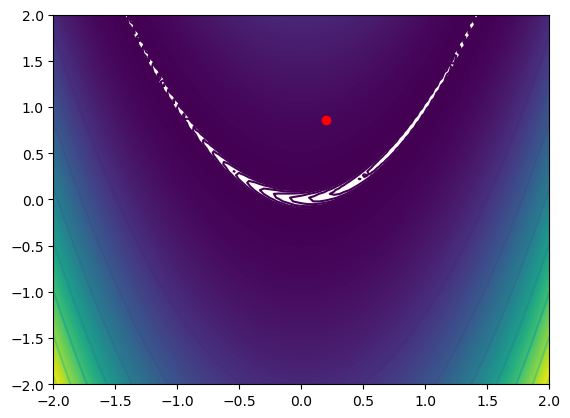

results of f_min:  68.32017645807709   number of iterations:   1
starting point: [0.19525402 0.86075747] value of function here: 68.32017645807709
ending point: [0.19525402 0.86075747] value of function here: 68.32017645807709


In [21]:
#calculating the inverse Hessian approximation B
def B_inverse(Binv_now, v, du):
    '''
    input --> Binv_now: the current value for B_inverse
              v and du are as explained in the theory above
    output --> Binv_next: the next value for B_inverse
    '''
    vT = np.transpose(v)
    duT = np.transpose(du)
    return Binv_now + (1 + (Binv_now*v)/(du))*du/v - (du*vT*Binv_now + Binv_now*v*duT/(duT*v))

#calculating positive-definiteness (borrowed from StackOverflow)
def is_pd(K):
    try:
        np.linalg.cholesky(K)
        return 1    
    except np.linalg.linalg.LinAlgError as err:
        return 0

#backtracking line search
#def line_search(xy_now, f=rosenbrock, N=1000):
#    '''
#    '''
#    alpha1 = np.random.random()
#    alpha2 = np.random.random()
#    cond_2 = 

#minimzation using BFGS    
def my_bfgs(xy0, f=rosenbrock, N=100):
    '''xy0: 1x2 array because it has x and y values'''
    
    #initial values
    xy_now = xy0
    xy_hist = []
    xy_hist.append(xy_now)
    Binv_now = np.identity(2)
    Binv_next = None
    
    for i in range(N):
        '''calculating appropriate step size'''
        df_now = derivative(xy_now, f)
        direction = Binv_now * -df_now
        step = 0.0001  #this is incorrect, should be backtracking line search
        xy_next = xy_now + (step*direction)
        
        '''checking which point i should go with next'''  #this whole section could be incorrect
        point1, point2 = xy_next[0], xy_next[1]
        point3 = np.array([point1[0], point2[1]])

        soln1 = derivative(point1, f)
        soln2 = derivative(point2, f)
        soln3 = derivative(point3, f)

        points = np.array([point1, point2, point3])
        solns = np.array([soln1, soln2, soln3])

        minpt = None
        minsoln = solns[0]
        for j in range(3):
            soln_check = solns[j]
            if soln_check[0] < minsoln[0] and soln_check[1] < minsoln[1]:
                minsoln = solns[j]
                minpt = points[j]
                
        if minpt is None:
            xy_next = points[0]
        else:
            xy_next = minpt
        
        '''calculating B'''
        df_next = derivative(xy_next, f)
        v = df_next - df_now
        du = xy_next - xy_now
        Binv_next = B_inverse(Binv_now, v, du)
            
        '''checking that B fulfills all requirements'''
        pd_check = is_pd(Binv_next)
        if pd_check == 1:
            frob_Bnext = np.linalg.norm(Binv_next, 'fro')
            frob_Bnow = np.linalg.norm(Binv_now, 'fro')
            if frob_Bnext - frob_Bnow <= 0.01:  #how to determine this value?
        
                #print(xy_next)
                #print("step:    ", f(xy_now), f(xy_next))
            
                if np.abs(df_now[0]) < 0.01 and np.abs(df_now[1]) < 0.01:
                    break
                else:
                    xy_now = xy_next
                    xy_hist.append(xy_now)
                    Binv_now = Binv_next
            else:
                break
        else:
            break
    return np.array(xy_hist), f(xy_now)

#doing the minimization
xy_hist, f_min = my_bfgs(init(x_min, x_max, y_min, y_max)) 

#plotting
fig2 = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)

plt.plot(xy_hist[:,0], xy_hist[:,1],'-ro')
plt.show()

print('results of f_min: ', f_min, '  number of iterations:  ', len(xy_hist))

print('starting point:', xy_hist[0], 'value of function here:', rosenbrock(xy_hist[0]))
print('ending point:', xy_hist[-1], 'value of function here:', rosenbrock(xy_hist[-1]))

### Comparing with scipy BFGS solution

In [25]:
from scipy.optimize import minimize

def init(x_min, x_max, y_min, y_max):
    np.random.seed(0)  #don't forget to take this away later
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return np.array([x0, y0])

[x0, y0] = init(x_min, x_max, y_min, y_max)
res = minimize(rosenbrock, x0, y0, method='BFGS', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.005202
         Iterations: 4
         Function evaluations: 16
         Gradient evaluations: 8


## References used
- lec 15
- https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3
- https://towardsdatascience.com/bfgs-in-a-nutshell-an-introduction-to-quasi-newton-methods-21b0e13ee504
- https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm
- https://github.com/qzhu2017/Numerical-Optimization/blob/master/Lecture_notes/08_Quasi_Newton.pdf
- https://stackoverflow.com/questions/16266720/find-out-if-matrix-is-positive-definite-with-numpy
- https://www.youtube.com/watch?v=QGFct_3HMzk